# DSCI 100: Introduction to Data Science

## Tutorial 6 - Classification I  (Training & predicting): Class activity
Consider the `penguins` dataset from the `palmerspenguins` package:

In [1]:
options(repr.matrix.max.rows = 6)
library(palmerpenguins)
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Chinstrap,Dream,49.6,18.2,193,3775,male,2009
Chinstrap,Dream,50.8,19.0,210,4100,male,2009
Chinstrap,Dream,50.2,18.7,198,3775,female,2009


Suppose we are given a new, unclassified penguin with

- `bill_length_mm` = 40
- `bill_depth_mm` = 18

Using R and the `tidymodels` package, how would you classify this penguin's species based on the $k=3$ nearest neighbours?

First, load the necessary libraries (we need `tidyverse` and `tidymodels`)

In [2]:
# your code here
library(tidyverse)
library(tidymodels)# No Answer - remove if you provide an answer

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Next, create a scatterplot to explore the relationship between the predictors/explanatory variables and the target variable.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


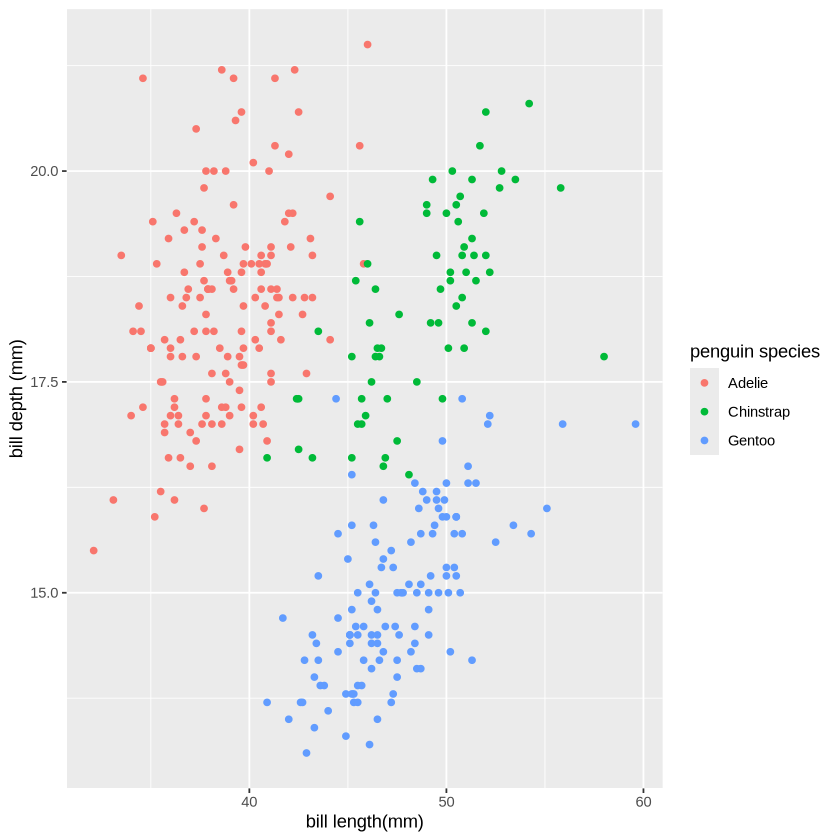

In [4]:
# your code here
ggplot(penguins,aes(x=bill_length_mm, y=bill_depth_mm, color=species))+
geom_point()+
labs(x="bill length(mm)", y="bill depth (mm)", color ="penguin species")# No Answer - remove if you provide an answer

Next, make the tidymodels workflow for the analysis:

1. Make a recipe for our model. Include centering and scaling preprocessing steps
2. Make the model specification. Use 3 neighbours.
3. Combine them in a workflow.

In [15]:
# Set the seed. Don't remove this!
set.seed(9999) 

penguin_recipe <- recipe(species ~ bill_length_mm + bill_depth_mm, data = penguins)|>
step_scale(all_predictors())|>
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

penguin_wkfl<- workflow() |>
  add_recipe(penguin_recipe) |>
  add_model(knn_spec) 

# your code here
# No Answer - remove if you provide an answer

Now train the model using the `fit` function.


In [16]:
# your code here
 penguin_fit<-fit(penguin_wkfl, data= penguins)# No Answer - remove if you provide an answer

Finally, predict the label for the new observation.

In [20]:
new_observation <- tibble(bill_length_mm=40, bill_depth_mm=18)
prediction <- predict(penguin_fit, new_observation)

prediction# No Answer - remove if you provide an answer

.pred_class
<fct>
Adelie
